### Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Решение задачи классификации эволюционных фаз звезд (Data_classified_phase.csv)

### Загрузка данных

In [3]:
df = pd.read_csv('Data_classified_phase.csv')
print(df.head())

   Kpmag  numax  e_numax  Delnu  e_Delnu      A    e_A  Width e_Width  Teff  \
0   9.20  29.99     0.60  3.399    0.011  104.9    4.6   12.3     1.5  4751   
1  13.23  29.48     0.48  3.962    0.116  149.7    8.3   12.0     3.9  5188   
2  12.58  41.39     0.54  4.311    0.013   86.1    4.6   15.3     1.6  4728   
3  12.14  41.17     0.90  4.414    0.061   63.8    2.9   24.8     2.7  5072   
4  11.74  36.91     0.71  3.991    0.064  116.1    9.6   14.0     2.4  4718   

   ...  e_NoCorR  RGBcorM  e_RGBcorM  RGBcorR  e_RGBcorR  ClcorM  e_ClcorM  \
0  ...      0.41     1.55       0.13    13.26       0.39    1.72      0.14   
1  ...      0.68     1.04       0.15    10.74       0.70    1.00      0.14   
2  ...      0.26     1.54       0.09    11.29       0.24    1.72      0.10   
3  ...      0.48     1.67       0.17    11.55       0.48    1.75      0.18   
4  ...      0.53     1.50       0.16    11.80       0.50    1.67      0.17   

   ClcorR  e_ClcorR  Phase  
0   13.97      0.41      1 

Исследование данных

In [4]:
# Проверка структуры данных
print("Информация о данных:")
print(df.info())

# Статистика по данным
print("\nОписательная статистика:")
print(df.describe())

# Распределение классов
print("\nРаспределение классов:")
print(df["Phase"].value_counts())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15388 entries, 0 to 15387
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kpmag      15388 non-null  float64
 1   numax      15388 non-null  float64
 2   e_numax    15388 non-null  float64
 3   Delnu      15388 non-null  float64
 4   e_Delnu    15388 non-null  float64
 5   A          15388 non-null  object 
 6   e_A        15388 non-null  object 
 7   Width      15388 non-null  object 
 8   e_Width    15388 non-null  object 
 9   Teff       15388 non-null  int64  
 10  e_Teff     15388 non-null  int64  
 11  log(g)     15388 non-null  float64
 12  e_log(g)   15388 non-null  float64
 13  [Fe/H]     15388 non-null  float64
 14  e_[Fe/H]   15388 non-null  float64
 15  NoCorM     15388 non-null  float64
 16  e_NoCorM   15388 non-null  float64
 17  NoCorR     15388 non-null  float64
 18  e_NoCorR   15388 non-null  float64
 19  RGBcorM    15388 non-null

Предобработка данных

Обработка дисбаланса классов

Phase
2    7703
1    7685
Name: count, dtype: int64


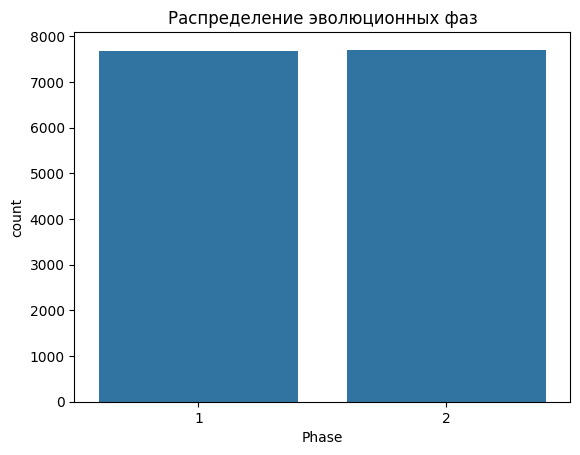

In [5]:
# Исключение неклассифицированных данных (Phase=0)
df_filtered = df[df["Phase"] != 0]

# Проверка нового распределения
print(df_filtered["Phase"].value_counts())

# Визуализация распределения классов
sns.countplot(x='Phase', data=df)
plt.title('Распределение эволюционных фаз')
plt.show()

Разделение данных

In [6]:
from sklearn.model_selection import train_test_split

# Замена пробелов на NaN и преобразование в числовой формат
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

# Применяем ко всем столбцам, кроме целевой переменной
for col in df.columns:
    if col != 'Phase':
        df[col] = df[col].apply(convert_to_float)


# Удаление строк с пропущенными значениями
df_clean = df.dropna()

# Проверка типов данных
print("\nПроверка типов данных после обработки:")
print(df_clean.dtypes)

# Разделение на признаки и целевую переменную
X = df_clean.drop(columns=['Phase'])
y = df_clean['Phase']

# Стратифицированное разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


Проверка типов данных после обработки:
Kpmag        float64
numax        float64
e_numax      float64
Delnu        float64
e_Delnu      float64
A            float64
e_A          float64
Width        float64
e_Width      float64
Teff         float64
e_Teff       float64
log(g)       float64
e_log(g)     float64
[Fe/H]       float64
e_[Fe/H]     float64
NoCorM       float64
e_NoCorM     float64
NoCorR       float64
e_NoCorR     float64
RGBcorM      float64
e_RGBcorM    float64
RGBcorR      float64
e_RGBcorR    float64
ClcorM       float64
e_ClcorM     float64
ClcorR       float64
e_ClcorR     float64
Phase          int64
dtype: object


Нормализация данных

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Обучение модели (kNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Оценка модели

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test_scaled)

print("Точность модели:", accuracy_score(y_test, y_pred))
print("\nМатрица ошибок:\n", confusion_matrix(y_test, y_pred))
print("\nОтчет классификации:\n", classification_report(y_test, y_pred))

Точность модели: 0.9442499326690008

Матрица ошибок:
 [[1674  113]
 [  94 1832]]

Отчет классификации:
               precision    recall  f1-score   support

           1       0.95      0.94      0.94      1787
           2       0.94      0.95      0.95      1926

    accuracy                           0.94      3713
   macro avg       0.94      0.94      0.94      3713
weighted avg       0.94      0.94      0.94      3713



Визуализация матрицы ошибок

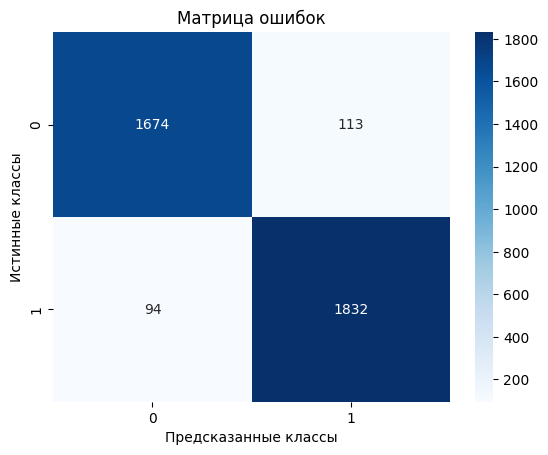

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.title("Матрица ошибок")
plt.show()

### Предварительный анализ данных

### Предобработка данных

In [11]:
# Замена пробелов на NaN и преобразование в числовой формат
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

# Применяем ко всем столбцам, кроме целевой переменной
for col in df.columns:
    if col != 'Phase':
        df[col] = df[col].apply(convert_to_float)

# Удаление столбцов с ошибками
df_clean = df.drop(columns=[col for col in df.columns if 'e_' in col])

# Удаление строк с пропущенными значениями
df_clean = df_clean.dropna()

# Проверка типов данных
print("\nПроверка типов данных после обработки:")
print(df_clean.dtypes)

# Разделение на признаки и целевую переменную
X = df_clean.drop(columns=['Phase'])
y = df_clean['Phase']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Проверка типов данных после обработки:
Kpmag      float64
numax      float64
Delnu      float64
A          float64
Width      float64
Teff       float64
log(g)     float64
[Fe/H]     float64
NoCorM     float64
NoCorR     float64
RGBcorM    float64
RGBcorR    float64
ClcorM     float64
ClcorR     float64
Phase        int64
dtype: object


### Построение и оценка моделей

In [12]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

# SVM
svm = SVC(random_state=42)
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')

### Сравнение моделей

In [13]:
models = {'Random Forest': grid_rf, 'SVM': grid_svm, 'Logistic Regression': grid_lr}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Модель: {name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}\n")

Модель: Random Forest
              precision    recall  f1-score   support

           1       0.94      0.92      0.93      2145
           2       0.93      0.94      0.94      2311

    accuracy                           0.93      4456
   macro avg       0.93      0.93      0.93      4456
weighted avg       0.93      0.93      0.93      4456

Accuracy: 0.93
F1-score: 0.93

Модель: SVM
              precision    recall  f1-score   support

           1       0.94      0.93      0.93      2145
           2       0.94      0.94      0.94      2311

    accuracy                           0.94      4456
   macro avg       0.94      0.94      0.94      4456
weighted avg       0.94      0.94      0.94      4456

Accuracy: 0.94
F1-score: 0.94

Модель: Logistic Regression
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      2145
           2       0.91      0.94      0.92      2311

    accuracy                           0.92      4456
   m

### Анализ важности признаков

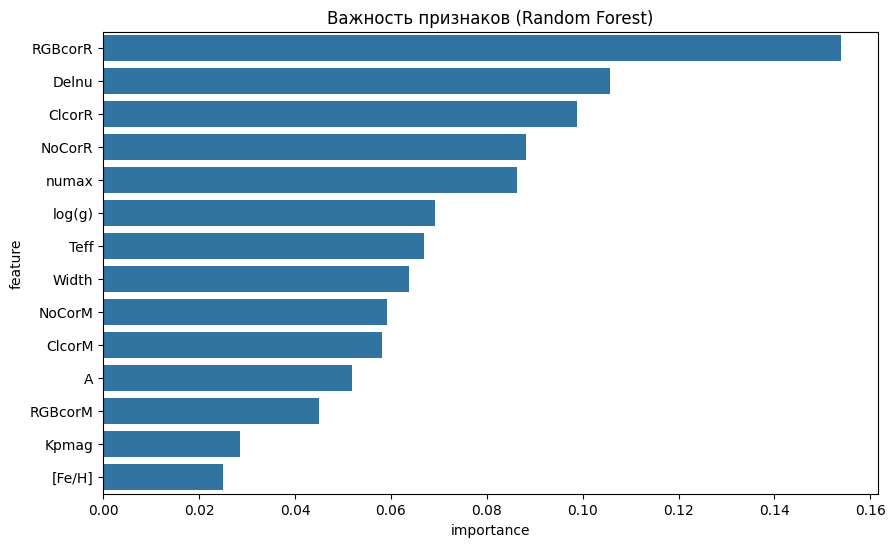

In [14]:
importances = grid_rf.best_estimator_.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Важность признаков (Random Forest)')
plt.show()

### Выводы по первой задаче:

- Лучшая модель: SVM с Accuracy 0.94 и F1-score 0.94.

- Важные признаки: RGBcorR, Delnu, ClcorR.

- Интерпретация: Классы сбалансированы, метрики F1 и Accuracy адекватны.